<div style="border:solid green 2px; padding: 20px">
    
~~Казбек, привет! Меня зовут Бунакова Влада. Если не возражаешь, предлагаю общаться на «ты» :)
Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='orange'>желтый — «хорошо, но можно лучше (один-два таких замечаний допустимы, но если их больше — придется исправлять)»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке. Будет здорово, если в своих новых комментариях (выделяй их другим цветом) ты напишешь о сделанных тобой изменениях в коде.~~
    
Казбек, спасибо за доработки! Осталось несколько небольших замечаний.

<div style="border:solid blue 2px; padding: 20px">
    
Привет, Влада! Конечно, не возражаю,Спасибо за оперативный ответ...

Давай я буду свои ответы на комментарии: <font color='blue'> будут голобуго цвета. 

<div style="border:solid blue 2px; padding: 20px">
    
Забегая вперед!
    
Спасибо - много нового узнал после исправления твоих замечаний!
    
Я исправил все замечания кроме одного <a href='#Error'>У меня не получается '</a>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


# Описание данных

#### Технологический процесс

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate**— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

#### Параметры этапов:

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

#### Наименование признаков

Наименование признаков должно быть такое: [этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

#### Возможные значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

#### Возможные значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики


# Технологический процесс

- Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.

На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

- Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.


# Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды. Эффективность обогащения рассчитывается по формуле

$$\begin{equation*}
Recovery = \frac{C\times(F-T)}{F\times(C-T)} \times 100\%
\end{equation*}$$

где:

- C — доля золота в концентрате после флотации/очистки;
 
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

# Метрика качества

sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:
$$\begin{equation*}
    sMAPE = \frac{1}{N}\sum_{i=1}^N\frac{\mid{y_i-y'_i}\mid}{(\mid{y_i}\mid+\mid{y'_i}\mid)/2} \times 100\%
\end{equation*}$$

где:

 - y(i) значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
 - y'(i) значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
 
##### Нужно спрогнозировать сразу две величины:

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

##### Итоговая метрика складывается из двух величин:

$$\begin{equation*}
   sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
\end{equation*}$$


# Содержание <a id='0.0'></a>

##### Часть 1. Загрузка и подготовка данных

<a href='#1.1'>1.1 Откройте файлы и изучите их.'</a>

<a href='#1.2'>1.2 Проверка правильности рассчета эффективность обогащения'</a>

<a href='#1.3'>1.3 Анализ признаков'</a>

<a href='#1.4'>1.4 Предобработка данных'</a>

<a href='#1.5'>1.5 Исследование корреляции признаков'</a>

##### Часть 2. Анализ данных

<a href='#2.1'>2.1 Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки'</a>

<a href='#2.2'>2.2 Исследование распределения гранул сырья в обучающей и тестовой выборке'</a>

<a href='#2.3'>2.3 Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах'</a>

##### Часть 3. Построение модели

<a href='#3.1'>3.1. Напишите функцию для вычисления итоговой sMAPE.'</a>

<a href='#3.2'>3.2. Обучение разных моделей и оценка их качества кросс-валидацией'</a>

<a href='#3.3'>3.3 Тестирование лучшей модели'</a>


##### Вывод

<a href='#3.4'> Выводы'</a>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 

~~1) Где продолжение? :)~~
    
~~2) Кроме общего описания задачи было бы здорово увидеть план ее решения. Пример:~~
    
~~### Содержание~~

~~##### Часть 1. Название первой части:~~
~~* [1. Название первого пункта первой части.](#the_destination)~~
~~* [2. Название второго пункта первой части.](#2-bullet)~~

~~##### Часть 2. Название второй части:~~
~~* [1. Название первого пункта второй части.](#3-bullet)~~
~~* [2. Название второго пункта второй части.](#4-bullet)~~

~~и т.д~~

~~Про то, как делать ссылки, чтобы переходить к разным частям проекта, читай <a href="https://sebastianraschka.com/Articles/2014_ipython_internal_links.html">тут.</a> ~~

</div>



<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Спасибо, что показала как делать содержание - плюс в мою маленькую копилку опыта. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Отлично. Только добавь еще названия подразделов в сам проект (вижу названия подразделов только в оглавлении).
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Добавил! и Еще добавил возврат на содержание). 

# 1. Подготовка данных 

### 1.1 Откройте файлы и изучите их. <a id='1.1'></a>

In [57]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 86)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")
# Импортируем необходимые библиотеки.

In [58]:
#train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
train_data = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/Сп_2/gold_recovery_train.csv')
display(train_data.head())
# чтение файла. Просмотрел общий вид таблиц и посмотрел инфу по файлу.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [59]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

In [60]:
#test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
test_data = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/Сп_2/gold_recovery_test.csv')
display(test_data.info())
# чтение файла. Просмотрел общий вид таблиц и посмотрел инфу по файлу.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

In [61]:
#full_data = pd.read_csv('/datasets/gold_recovery_full.csv')
full_data = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/Сп_2/gold_recovery_full.csv')
display(full_data.info())
# чтение файла. Просмотрел общий вид таблиц и посмотрел инфу по файлу.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

<div style="border:solid gray 2px; padding: 20px">
Заказчик иследования предоставил нам 3 таблицы - одна с исходными данными и две разделенные (тренировочная и обучающая выборка). 
    
 * Обучающий датасет содержит 16860 записей и 87 столбцов
 * Тестовый датасет содержит 5856 записей и 53 столбца
 * Полный датасет содержит  22716 записей и 87 столбцов
 
В тестовую таблицу попали только 53 столбца. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Стoлбцы именованны в нижнем регистре на латинице. Но есть точки в названниях - желательно перевести их в нижнее подчеркивание. В данных есть много пропусков, исследуем их количество.

In [62]:
train_data.columns = train_data.columns.str.replace("[.]", "_")
test_data.columns = test_data.columns.str.replace("[.]", "_")
full_data.columns = full_data.columns.str.replace("[.]", "_")
# изменим названия всех столбцов, заменим точки на нижнее подчеркивание - так будет проще работать!

In [63]:
#display(full_data.info())

<a href='#0.0'>Содержание'</a>

### 1.2 Проверка правильности рассчета эффективность обогащени <a id='1.2'></a>

In [64]:
# Проверим, что эффективность обогащения рассчитана правильно. 
# Вычислим её на обучающей выборке для признака rougher.output.recovery. 
# Найдем MAE между нашими расчётами и значением признака. 
display(train_data['rougher_output_recovery'].value_counts().head(10))
rougher_recovery = train_data['rougher_output_recovery'].dropna()
# Проверим на пропуски
display(rougher_recovery.isna().sum())

0.000000      320
83.406924      10
100.000000      6
91.792293       5
91.636690       4
85.533758       3
89.524066       1
77.463713       1
87.281625       1
79.828758       1
Name: rougher_output_recovery, dtype: int64

0

In [65]:
# Создадим функцию расчета эффективность обогащения
def rec(C,F,T):
    recovery = ((C*(F-T))/(F*(C-T)))*100
    return recovery

<div style="border:solid gray 2px; padding: 20px">
    
 C = rougher.output.concentrate_au — доля золота в концентрате после флотации/очистки;
 
 F = rougher.input.feed_au — доля золота в сырье/концентрате до флотации/очистки;
 
 T = rougher.output.tail_au — доля золота в отвальных хвостах после флотации/очистки.


In [66]:
# Применим функцию и проверим на пропуски
recovery = rec(train_data['rougher_output_concentrate_au'],train_data['rougher_input_feed_au'],
               train_data['rougher_output_tail_au'])
display(recovery.value_counts())
display(recovery.isna().sum())

-0.000000      320
-inf            29
 83.406924      10
 100.000000      6
 91.792293       5
              ... 
 81.222672       1
 90.893920       1
 78.166353       1
 90.242793       1
 84.111039       1
Length: 14207, dtype: int64

2283

In [67]:
# Заменим значения inf на пропуски и затем удалим пропуски
recovery = recovery.replace([-np.inf,np.inf],[None,None])
recovery = recovery.dropna()
display(recovery.value_counts().head(10))
display(recovery.isna().sum())

-0.000000      320
 83.406924      10
 100.000000      6
 91.792293       5
 91.636690       4
 85.533758       3
 95.647541       1
 72.669867       1
 83.217311       1
 86.298677       1
dtype: int64

0

In [68]:
# Расчитаем МАЕ
mae = (rougher_recovery-recovery).abs().sum()/len(recovery)
display(f'Средняя абсолютная ошибка (МАЕ) между рассчетами составляет : {mae}')

'Средняя абсолютная ошибка (МАЕ) между рассчетами составляет : 9.27608241893178e-15'

<div class="alert alert-info">
МАЕ очень низкая и стремится к нулю, точности расчета эффективности обогащения - высокая.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
MAE найдено верно. Значит, формула для расчета эффективности корректная, и доступные данные ее подтверждают.
    
Обрати внимание, столбцы rougher_recovery (истинные значения без пропусков) и recovery (рассчитанные по формуле без пропусков и бесконечностей) **разной длины**. Лучше было бы создать таблицу из двух столбцов: с истинными и соответствующими предсказанными значениями, удалить в ней пропуски, а затем вычислить MAE.
</div>

<a href='#0.0'>Содержание'</a>

### 1.3 Анализ признаков <a id='1.3'></a>

In [69]:
# Проанализируем признаки, недоступные в тестовой выборке.
set(train_data.columns) - set(test_data.columns)

{'final_output_concentrate_ag',
 'final_output_concentrate_au',
 'final_output_concentrate_pb',
 'final_output_concentrate_sol',
 'final_output_recovery',
 'final_output_tail_ag',
 'final_output_tail_au',
 'final_output_tail_pb',
 'final_output_tail_sol',
 'primary_cleaner_output_concentrate_ag',
 'primary_cleaner_output_concentrate_au',
 'primary_cleaner_output_concentrate_pb',
 'primary_cleaner_output_concentrate_sol',
 'primary_cleaner_output_tail_ag',
 'primary_cleaner_output_tail_au',
 'primary_cleaner_output_tail_pb',
 'primary_cleaner_output_tail_sol',
 'rougher_calculation_au_pb_ratio',
 'rougher_calculation_floatbank10_sulfate_to_au_feed',
 'rougher_calculation_floatbank11_sulfate_to_au_feed',
 'rougher_calculation_sulfate_to_au_concentrate',
 'rougher_output_concentrate_ag',
 'rougher_output_concentrate_au',
 'rougher_output_concentrate_pb',
 'rougher_output_concentrate_sol',
 'rougher_output_recovery',
 'rougher_output_tail_ag',
 'rougher_output_tail_au',
 'rougher_output_ta

<div style="border:solid gray 2px; padding: 20px">
    
Отсутсвуют 34 столбца. В основном это все выходные конечные данные после производственных процесов:
    
 - черновые концентраты и хвосты (rougher.output.concentrate_au,rougher.output.tail_au),
    
 - первичные концентраты и хвосты (primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au),
    
 - вторичные хвосты(secondary_cleaner.output.tail_au) 
    
 - финальные концентраты и хвосты(final.output.concentrate_au,final.output.tail_au) 
    
 - расчетные характеристики (rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed, rougher.calculation.floatbank11_sulfate_to_au_feed, rougher.calculation.au_pb_ratio)
    
 - признаки расчета эффективности чернового концетрата и финального продукта(rougher.output.recovery,final.output.recovery)

Тип данных во всех осутствующих столбцах - float64(дробный)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Список недоступных в тестовой выборке признаков найден верно. Это выходные (output) и некоторые расчетные (calculation) характеристики процесса. Данные параметры недоступны, так как их невозможно получить/измерить во время выполнения технологического процесса.
</div>

<a href='#0.0'>Содержание'</a>

### 1.4 Предобработка данных<a id='1.4'></a>

In [70]:
# Для начала оставим в обучающей таблице только те столбцы, которые есть в тестовой
train_data = train_data[test_data.columns]

In [71]:
# Посмотрим какое колличество пропусков в каждой таблице и проверим на наличие дубликатов
display(test_data.isna().sum().head(86))
display(f'Количество дубликатов : {test_data.duplicated().sum()}')

date                                            0
primary_cleaner_input_sulfate                 302
primary_cleaner_input_depressant              284
primary_cleaner_input_feed_size                 0
primary_cleaner_input_xanthate                166
primary_cleaner_state_floatbank8_a_air         16
primary_cleaner_state_floatbank8_a_level       16
primary_cleaner_state_floatbank8_b_air         16
primary_cleaner_state_floatbank8_b_level       16
primary_cleaner_state_floatbank8_c_air         16
primary_cleaner_state_floatbank8_c_level       16
primary_cleaner_state_floatbank8_d_air         16
primary_cleaner_state_floatbank8_d_level       16
rougher_input_feed_ag                          16
rougher_input_feed_pb                          16
rougher_input_feed_rate                        40
rougher_input_feed_size                        22
rougher_input_feed_sol                         67
rougher_input_feed_au                          16
rougher_input_floatbank10_sulfate             257


'Количество дубликатов : 0'

In [72]:
display(train_data.isna().sum().head(86))
display(f'Количество дубликатов : {train_data.duplicated().sum()}')

date                                             0
primary_cleaner_input_sulfate                 1307
primary_cleaner_input_depressant              1262
primary_cleaner_input_feed_size                  0
primary_cleaner_input_xanthate                 985
primary_cleaner_state_floatbank8_a_air          40
primary_cleaner_state_floatbank8_a_level        33
primary_cleaner_state_floatbank8_b_air          40
primary_cleaner_state_floatbank8_b_level        27
primary_cleaner_state_floatbank8_c_air          38
primary_cleaner_state_floatbank8_c_level        27
primary_cleaner_state_floatbank8_d_air          39
primary_cleaner_state_floatbank8_d_level        27
rougher_input_feed_ag                           82
rougher_input_feed_pb                          228
rougher_input_feed_rate                        513
rougher_input_feed_size                        417
rougher_input_feed_sol                         292
rougher_input_feed_au                           83
rougher_input_floatbank10_sulfa

'Количество дубликатов : 0'

In [73]:
display(full_data.isna().sum().head(86))
display(f'Количество дубликатов : {full_data.duplicated().sum()}')

date                                                     0
final_output_concentrate_ag                             89
final_output_concentrate_pb                             87
final_output_concentrate_sol                           385
final_output_concentrate_au                             86
final_output_recovery                                 1963
final_output_tail_ag                                    83
final_output_tail_pb                                   200
final_output_tail_sol                                  271
final_output_tail_au                                    81
primary_cleaner_input_sulfate                         1609
primary_cleaner_input_depressant                      1546
primary_cleaner_input_feed_size                          0
primary_cleaner_input_xanthate                        1151
primary_cleaner_output_concentrate_ag                   98
primary_cleaner_output_concentrate_pb                  448
primary_cleaner_output_concentrate_sol                 7

'Количество дубликатов : 0'

<div class="alert alert-info">
По условию нашей задачи данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.Данные упорядочены по дате, можно заполнить пропуск средним между известными значениями.
</div>

In [74]:
# столбец date переведем в формат даты. Сделаем столбец date индексом для всех таблиц, методом interpolate заполним все пропуски
train_data['date'] = pd.to_datetime(train_data['date'], dayfirst=True)
train_data = train_data.set_index(['date'])
train_data = train_data.interpolate(method='time')
display(train_data.head())

,primary_cleaner_input_sulfate,primary_cleaner_input_depressant,primary_cleaner_input_feed_size,primary_cleaner_input_xanthate,primary_cleaner_state_floatbank8_a_air,...,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
date,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [75]:
display(train_data.isna().sum().head(83))

primary_cleaner_input_sulfate                 0
primary_cleaner_input_depressant              0
primary_cleaner_input_feed_size               0
primary_cleaner_input_xanthate                0
primary_cleaner_state_floatbank8_a_air        0
primary_cleaner_state_floatbank8_a_level      0
primary_cleaner_state_floatbank8_b_air        0
primary_cleaner_state_floatbank8_b_level      0
primary_cleaner_state_floatbank8_c_air        0
primary_cleaner_state_floatbank8_c_level      0
primary_cleaner_state_floatbank8_d_air        0
primary_cleaner_state_floatbank8_d_level      0
rougher_input_feed_ag                         0
rougher_input_feed_pb                         0
rougher_input_feed_rate                       0
rougher_input_feed_size                       0
rougher_input_feed_sol                        0
rougher_input_feed_au                         0
rougher_input_floatbank10_sulfate             0
rougher_input_floatbank10_xanthate            0
rougher_input_floatbank11_sulfate       

In [76]:
test_data['date'] = pd.to_datetime(test_data['date'], dayfirst=True)
test_data = test_data.set_index(['date'])
test_data = test_data.interpolate(method='time')

In [77]:
# В full_data в целевых признаках нужно удалить пропуски, а не заполнять дабы не исказить предсказания в моделях
full_data['date'] = pd.to_datetime(full_data['date'], dayfirst=True)
full_data = full_data.set_index(['date'])
full_data = full_data.dropna(subset=['rougher_output_recovery','final_output_recovery'])
full_data = full_data.interpolate(method='time')
#display(full_data.isna().sum().head(83))

In [78]:
# Оставим в обучающей и тестовой выборках индексы значений только совпадающие с индексами в Общей выборке.
#train_data = train_data[~train_data.index.isin(full_data.index)]
#test_data = test_data[~test_data.index.isin(full_data.index)]
train_data = train_data.query('index in @full_data.index')
test_data = test_data.query('index in @full_data.index')
display(train_data.isna().sum().head(83))

primary_cleaner_input_sulfate                 0
primary_cleaner_input_depressant              0
primary_cleaner_input_feed_size               0
primary_cleaner_input_xanthate                0
primary_cleaner_state_floatbank8_a_air        0
primary_cleaner_state_floatbank8_a_level      0
primary_cleaner_state_floatbank8_b_air        0
primary_cleaner_state_floatbank8_b_level      0
primary_cleaner_state_floatbank8_c_air        0
primary_cleaner_state_floatbank8_c_level      0
primary_cleaner_state_floatbank8_d_air        0
primary_cleaner_state_floatbank8_d_level      0
rougher_input_feed_ag                         0
rougher_input_feed_pb                         0
rougher_input_feed_rate                       0
rougher_input_feed_size                       0
rougher_input_feed_sol                        0
rougher_input_feed_au                         0
rougher_input_floatbank10_sulfate             0
rougher_input_floatbank10_xanthate            0
rougher_input_floatbank11_sulfate       

<a id='Error'></a>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
Пропуски в целевых столбцах (их у нас два) заполнять некорректно, их следует удалить.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Остальные пропуски, действительно, можно заполнить методом interpolate. Или их можно было заполнить предыдущими значениями.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Я не решался что-то удалять из-за уменьшения  датасета, но если я правильно понимаю - в целевых признаках нужно удалить пропуски, а не заполнять дабы не исказить предсказания в моделях? В итоге у меня не получается удалить пропуски в целевых признаках full - у меня так не работает подсчет лучшей модели, так как появляются около 1000 пропусков после того как я разделяю выборку на features и target - train_target_rougher = full_data.loc[train_data.index,'rougher_output_recovery']. Если удалить эти новые пропуски, то у нас не совпадают выборки, которые мы подаем на модель... Что делать? подскажи....

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>    
Да, пропуски в целевых признаках обязательно следует удалять, чтобы не исказить предсказания. Да, можно сначала удалить пропуски в целевых признаках выборки full, но затем нужно оставить в обучающей и тестовой выборке только те записи, которые остались в выборке full (пригодится функция *.isin(full_data.index)).
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Мучался с isin(full_data.index)) но, что-то не не получилось )) буду сидеть учить. Пока решил сделать методом query('index in @full_data.index')

<div class="alert alert-info">
Проверим корреляцию между целевыми признаками и всеми остальными, выведим на экран только корреляцию больше 0.5. Так же посмотрим на статистические показатели, посмотрим на стандартное отклонение среднее, медиану и максимальные и минимальные значения
</div>

<a href='#0.0'>Содержание'</a>

### 1.5 Исследование корреляции признаков <a id='1.5'></a>

In [79]:
# Создадим функцию, которая выводит корреляцию между признаками и целевым признаком.
# Функция получает таблицу с нужными столбцами на входе, перебирает циклом столбцы и выводит корреляцию
def corr_output(data):
    for column in data:
        correlation_1 = full_data['rougher_output_recovery'].corr(data[column]) # выводим корреляцию методом corr
        if abs(correlation_1) >= 0.5:
            display('Корреляция между целевым признаком rougher recovery и признаком {}: {:.2f}'.format(column, correlation_1))
        correlation_2 = full_data['final_output_recovery'].corr(data[column]) # выводим корреляцию методом corr
        if abs(correlation_2) >= 0.5:
            display('Корреляция между целевым признаком final recovery и признаком {}: {:.2f}'.format(column, correlation_2))
corr_output(train_data)

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
~~С 0.5 нужно сравнивать **абсолютное** значение коэффициента корреляции, так как коэффициент может принимать и отрицательные значения.~~
    
~~Замечание относится и к анализу корреляций ниже – с порогом 0.7 необходимо сравнивать абсолютные значения.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Все верно! Действительно, если я указываю условия >= то отрицательные значения не попадут на вывод! а по модулю все заработает, но единственный минус мы не сможем понять это отрицательная корреляция или положительная )) Исправил!

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Да, все верно.
</div>

In [80]:
train_data.describe()

,primary_cleaner_input_sulfate,primary_cleaner_input_depressant,primary_cleaner_input_feed_size,primary_cleaner_input_xanthate,primary_cleaner_state_floatbank8_a_air,...,secondary_cleaner_state_floatbank5_a_level,secondary_cleaner_state_floatbank5_b_air,secondary_cleaner_state_floatbank5_b_level,secondary_cleaner_state_floatbank6_a_air,secondary_cleaner_state_floatbank6_a_level
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,133.186336,8.851629,7.322310,0.881161,1608.015611,...,-483.957101,13.064233,-483.967715,19.576542,-506.804980
std,39.618377,3.376536,0.614062,0.375985,128.384508,...,37.891666,5.765570,39.206766,5.764623,37.085999
min,0.003112,0.000000,1.080000,0.000005,0.006352,...,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,106.768242,6.037872,6.960000,0.604464,1595.695815,...,-500.363169,8.994384,-500.105994,14.989244,-500.745309
50%,132.967762,8.033766,7.290000,0.887145,1601.827195,...,-499.702424,11.997537,-499.914556,19.984165,-500.061488
75%,159.797693,11.512843,7.700000,1.100079,1699.717397,...,-487.864322,17.982826,-453.274822,24.991615,-499.536481
max,250.127834,20.052255,10.470000,2.512968,2079.531340,...,-275.073125,27.926001,-157.396071,32.188906,-104.427459


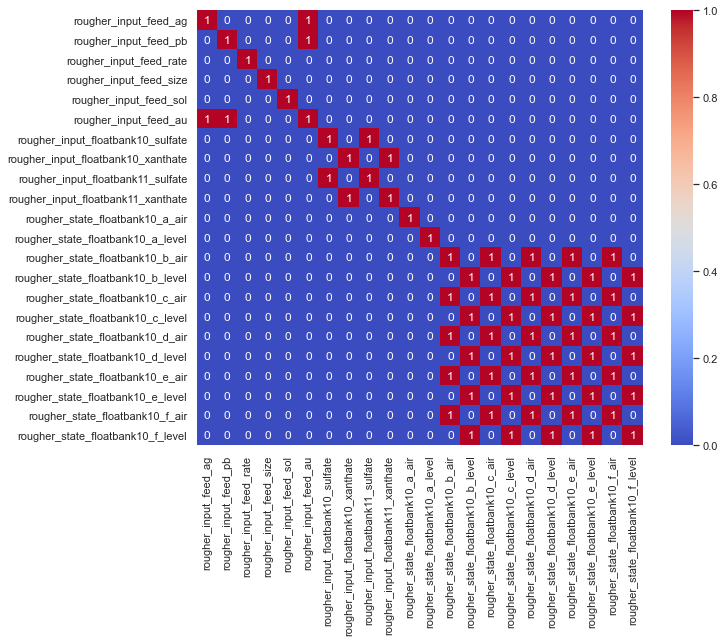

In [81]:
# Визуализируем нашу корреляцию, но уже между всеми признаками на этапе флотации
# выведим корреляцию больше 0.7 - сильная корреляция
plt.figure(figsize=(10,8))
sns.heatmap(abs(train_data.loc[:,'rougher_input_feed_ag':'rougher_state_floatbank10_f_level'].corr())>=0.70,
            cmap='coolwarm',annot=True)

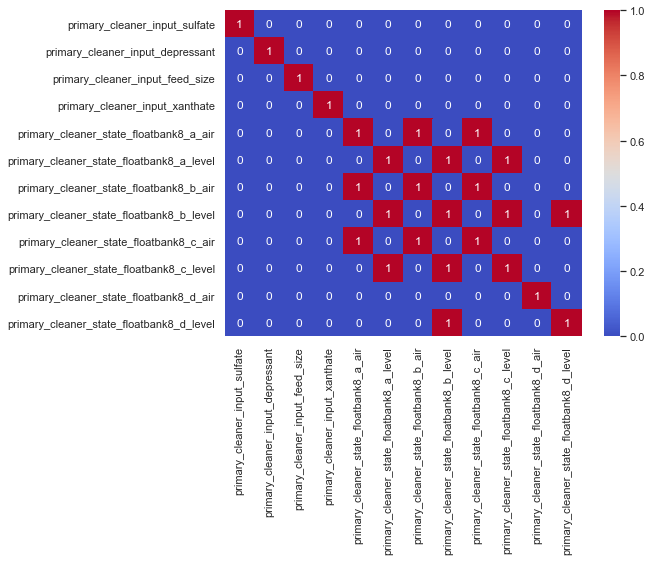

In [82]:
# Визуализируем нашу корреляцию, но уже между всеми признаками на первоначальном этапе отчистки,
# выведим корреляцию больше 0.7 - сильная корреляция
plt.figure(figsize=(8,6))
sns.heatmap(abs(train_data.loc[:,:'primary_cleaner_state_floatbank8_d_level'].corr())>=0.70,cmap='coolwarm',annot=True)

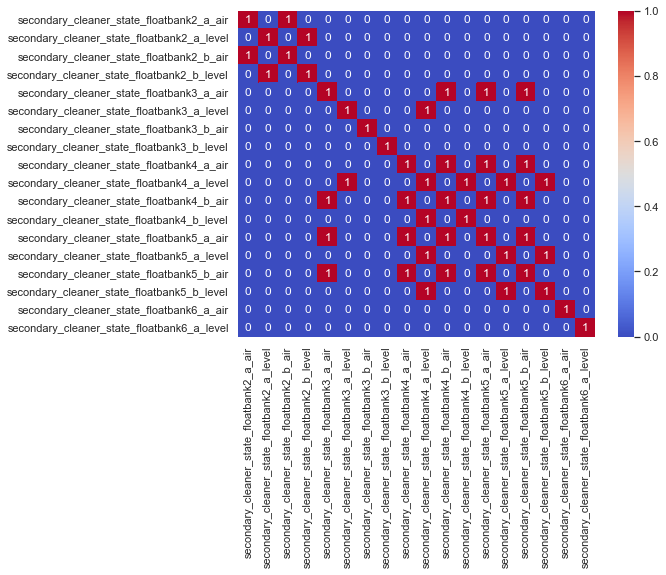

In [83]:
# Визуализируем нашу корреляцию, но уже между всеми признаками на первоначальном этапе отчистки,
# выведим корреляцию больше 0.7 - сильная корреляция
plt.figure(figsize=(8,6))
sns.heatmap(abs(train_data.loc[:,'secondary_cleaner_state_floatbank2_a_air':'secondary_cleaner_state_floatbank6_a_level'].corr())>=0.70,
           cmap='coolwarm',annot=True)

<div class="alert alert-info">
В ходе проведенного анализа сделали следующее:
Изменили названия всех столбцов, заменим точки на нижнее подчеркивание.
В данных обнаружены пропуски, дубликаты отсутствуют.
Провели точность расчета эффективности обогащения для руды МАЕ.
Проанализированы признаки, недоступные в тестовой выборке.
Заполнены пропуски в данных.
Изучили корреляцию и статистические показатели
Можно было удалить коррелирующие столбцы для облегчения датасета, но не стал этого делать так, как не известно какие данные понадобятся заказчику
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Корреляция по модулю выше 0.7 считается высокой, выше 0.9 – очень высокой. Можно было бы подготовить несколько наборов признаков: с удалением высоко/очень высоко скоррелированных столбцов и без удаления и сравнить результаты.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Я  так и планировал сделать, но из-за дедлайна я делал все быстро и с ошибками)) обычно, после зачтения проекта я с ним экспериментирую у себя локально...

<a href='#0.0'>Содержание'</a>

# 2. Анализ данных

### 2.1 Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки <a id='2.1'></a>

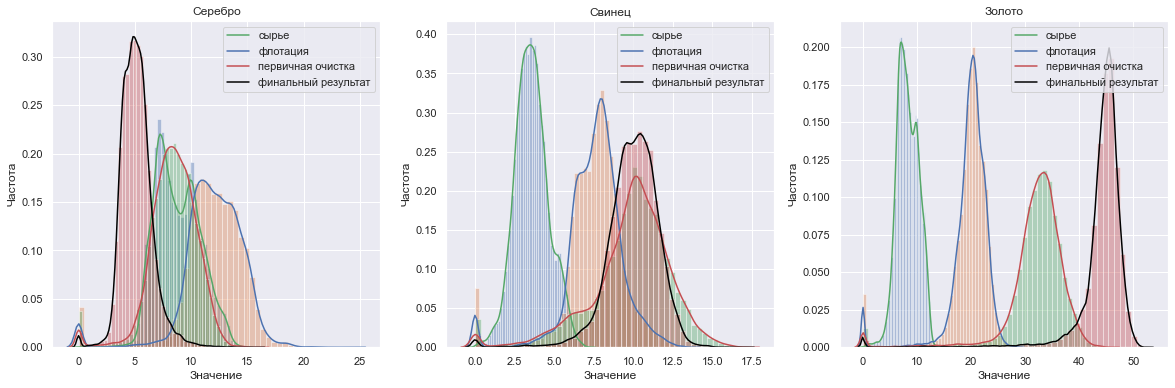

In [84]:
# Посмотриv, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
plt.subplots(figsize=(20,6))
sns.set(style="darkgrid")

plt.subplot(1,3,1)
ax = sns.distplot(full_data['rougher_input_feed_ag'],
                  kde_kws={"color": "g", "label": "сырье"})
ax = sns.distplot(full_data['rougher_output_concentrate_ag'],
                  kde_kws={"color": "b", "label": "флотация"})
ax = sns.distplot(full_data['primary_cleaner_output_concentrate_ag'],
                  kde_kws={"color": "r", "label": "первичная очистка"})
ax = sns.distplot(full_data['final_output_concentrate_ag'],
                  kde_kws={"color": "black", "label": "финальный результат"})                                                   
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
plt.title('Серебро')

plt.subplot(1,3,2)
ax = sns.distplot(full_data['rougher_input_feed_pb'],
                  kde_kws={"color": "g", "label": "сырье"})
ax = sns.distplot(full_data['rougher_output_concentrate_pb'],
                  kde_kws={"color": "b", "label": "флотация"})
ax = sns.distplot(full_data['primary_cleaner_output_concentrate_pb'],
                  kde_kws={"color": "r", "label": "первичная очистка"})
ax = sns.distplot(full_data['final_output_concentrate_pb'],
                  kde_kws={"color": "black", "label": "финальный результат"})                                                   
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
plt.title('Свинец')

plt.subplot(1,3,3)
ax = sns.distplot(full_data['rougher_input_feed_au'],
                  kde_kws={"color": "g", "label": "сырье"})
ax = sns.distplot(full_data['rougher_output_concentrate_au'],
                  kde_kws={"color": "b", "label": "флотация"})
ax = sns.distplot(full_data['primary_cleaner_output_concentrate_au'],
                  kde_kws={"color": "r", "label": "первичная очистка"})
ax = sns.distplot(full_data['final_output_concentrate_au'],
                  kde_kws={"color": "black", "label": "финальный результат"})   
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
plt.title('Золото')

plt.show()

<div class="alert alert-info">
Концентрация металлов менялась в сторону увеличения доли золота на каждом последующем этапе при этом свинец тоже увеличевался до последнего этапа отчистки(после первичной отчистки концентрация металла перестала увеличиваться). Доля серебра же наоборот снижается с каждым этапом отчистки.
<div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Добавь этап rougher.input.feed_*.~~
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Графики отличные, но лучше их перегруппировать: изобразить по одному графику для каждого металла, а этапы выделить разными цветами. Так проследить изменение концентраций будет легче.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! забыл про сырье

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>    
Проверь выводы: что происходит с концентрацией свинца?
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Дополнил! 

<a href='#0.0'>Содержание'</a>

### 2.2 Исследование распределения гранул сырья в обучающей и тестовой выборке <a id='2.2'></a>

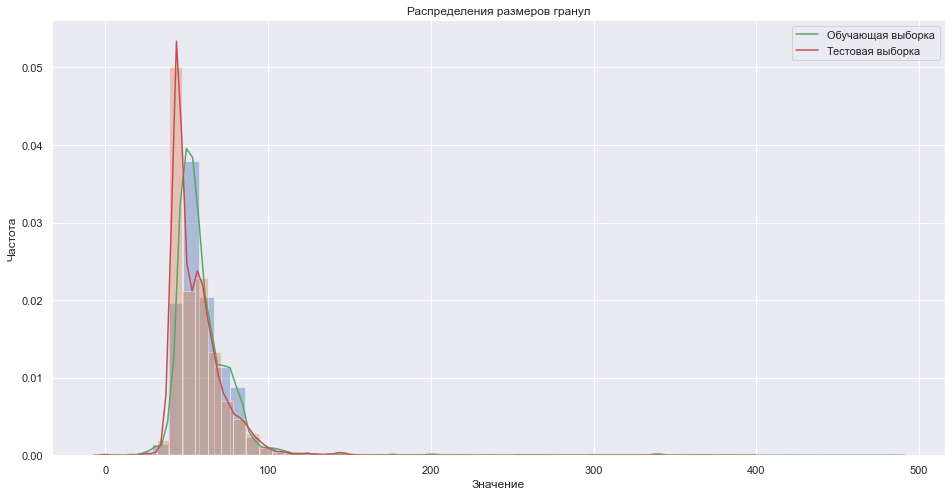

In [85]:
# Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 
# Создадим график для визуального анализа распредиления
plt.subplots(figsize=(16,8))
ax = sns.distplot(train_data['rougher_input_feed_size'],
                  kde_kws={"color": "g", "label": "Обучающая выборка"})
ax = sns.distplot(test_data['rougher_input_feed_size'],
                  kde_kws={"color": "r", "label": "Тестовая выборка"})
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
plt.title('Распределения размеров гранул')
plt.show()

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 
    
~~Нас интересует размер гранул **сырья** rougher.input.feed_size.~~
</div>

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
    
~~Так как число объектов в обучающей и тестовой выборках отличается, то сравнивать гистограммы **частот** между собой неудобно, нужны гистограммы/кривые **плотностей распределений**. Но так как ты ниже еще изображаешь графики boxplot, то замечание не критическое.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! Это все дедлайн виноват )))

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>    
Отличный график :) Визуально значительных отличий между распределениями нет.
</div>

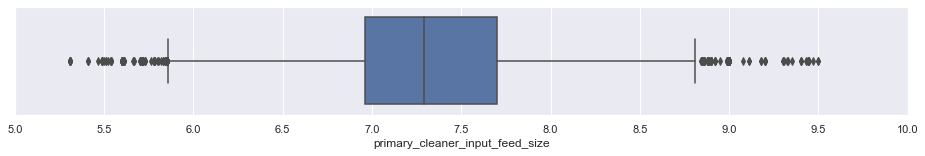

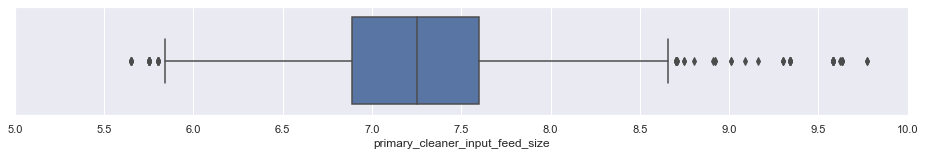

In [86]:
# посторим ящик с усами для наглядного анализа выбросов и аномальных значений
plt.figure(figsize=(16,2))
plt.xticks(np.arange(0,16,step=0.5))
plt.xlim(5, 10)
sns.boxplot(x='primary_cleaner_input_feed_size', data=train_data)
plt.show()    
plt.figure(figsize=(16,2))
plt.xticks(np.arange(0,16,step=0.5))
plt.xlim(5, 10)
sns.boxplot(x='primary_cleaner_input_feed_size', data=test_data)
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
~~Задай один и тот же диапазон по оси x для удобства сравнения.~~
</div>

In [87]:
# Выведим статистические показатели для сравнения распредилений
display('Статистические показатели обучающей выборки:')
display(train_data['primary_cleaner_input_feed_size'].describe())
display('Статистические показатели тестовой выборки:')
display(test_data['primary_cleaner_input_feed_size'].describe())

'Статистические показатели обучающей выборки:'

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner_input_feed_size, dtype: float64

'Статистические показатели тестовой выборки:'

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner_input_feed_size, dtype: float64

<div class="alert alert-info">
Распределения на графике имеет похожую форму и принимают одинаковые значения, с разной плотностью для разных выборок. Изучим описательные статистики:максимальные значения 10 и 15 - можно отбросить значения свыше 11, минимальные значения 1 и 5 - можно отбросить то, что меньше 1, средние одинаковы для выборок, медиана почти одинаковая. Распределения не отличаются.
<div>

<a href='#0.0'>Содержание'</a>

### 2.3 Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах <a id='2.3'></a>

In [88]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 
# Создадим функцию, которая выводит три три параметра с суммарным значением столбцов концентрации металлов
def total_concentration(data):
    raw_material = (data['rougher_input_feed_ag']+
                              data['rougher_input_feed_pb']+
                              data['rougher_input_feed_sol']+
                              data['rougher_input_feed_au'])
    rough = (data['rougher_output_concentrate_ag']+
                                      data['rougher_output_concentrate_pb']+
                                      data['rougher_output_concentrate_au']+
                                      data['rougher_output_concentrate_sol'])
    final = (data['final_output_concentrate_ag']+
                                    data['final_output_concentrate_pb']+
                                    data['final_output_concentrate_au']+
                                    data['final_output_concentrate_sol'])
    return raw_material,rough,final

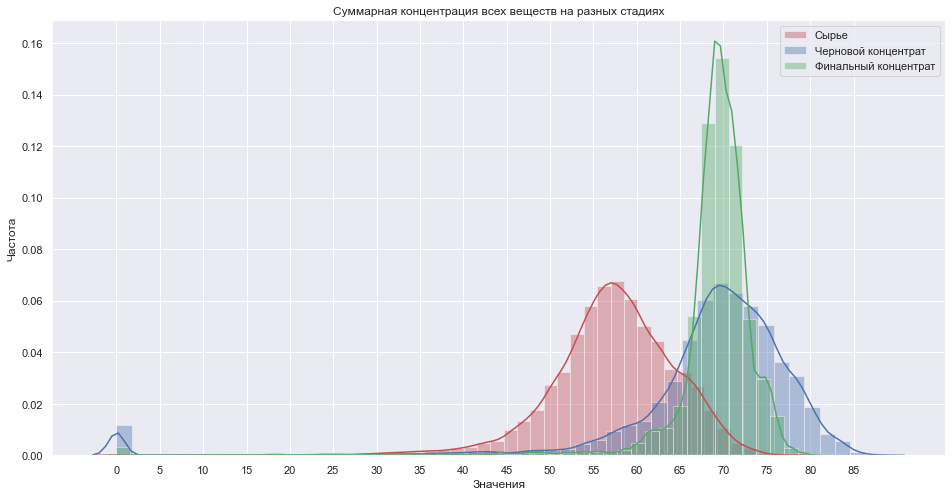

In [89]:
rougher_input_feed_all,rougher_output_concentrate_all,final_output_concentrate_all = total_concentration(full_data)
# Построим график для визуального анализа
plt.figure(figsize=(16,8))
sns.distplot(rougher_input_feed_all,color='r')
sns.distplot(rougher_output_concentrate_all,color='b')
sns.distplot(final_output_concentrate_all,color='g')
plt.xticks(np.arange(0,90,step=5))
plt.legend(labels=['Сырье','Черновой концентрат','Финальный концентрат'])
plt.title("Суммарная концентрация всех веществ на разных стадиях")
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info">
Очень много аномальных значений равных нулю, скорее всего возникли из-за ошибок выгрузки данных,аномалии необходимо удалить в обеих выборках.
<div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
График отличный. Да, видно значительное число околонулевых наблюдений. Скорее всего, они связаны со сбоями измерительного оборудования, их необходимо удалить.
</div>

In [90]:
# Создадим функцию для удаления аномалий
def removing_zeros(data,column):   
    data[column] = data[data[column]>=1][column]
    data.dropna(subset = [column], inplace = True)
    return data[column]

In [91]:
# Применим функцию к обучающей выборке
train_data['rougher_input_feed_ag'] = removing_zeros(train_data,'rougher_input_feed_ag')
train_data['rougher_input_feed_pb'] = removing_zeros(train_data,'rougher_input_feed_pb')
train_data['rougher_input_feed_sol'] = removing_zeros(train_data,'rougher_input_feed_sol')
train_data['rougher_input_feed_au'] = removing_zeros(train_data,'rougher_input_feed_au')

In [92]:
# Применим функцию к тестовой выборке
test_data['rougher_input_feed_ag'] = removing_zeros(test_data,'rougher_input_feed_ag')
test_data['rougher_input_feed_pb'] = removing_zeros(test_data,'rougher_input_feed_pb')
test_data['rougher_input_feed_sol'] = removing_zeros(test_data,'rougher_input_feed_sol')
test_data['rougher_input_feed_au'] = removing_zeros(test_data,'rougher_input_feed_au')

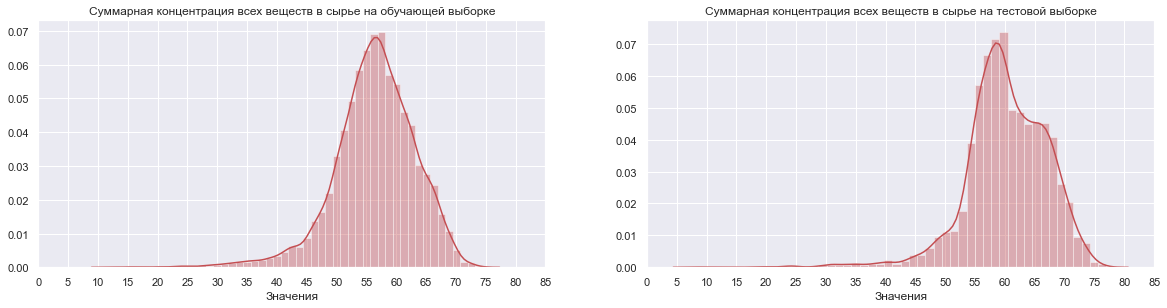

In [93]:
# Проверим наше удаление и выведим график по нужным нам столбцам в обучающей и тестовой выборках
raw_material_train = (train_data['rougher_input_feed_ag']+
                              train_data['rougher_input_feed_pb']+
                              train_data['rougher_input_feed_sol']+
                              train_data['rougher_input_feed_au'])
raw_material_test = (test_data['rougher_input_feed_ag']+
                              test_data['rougher_input_feed_pb']+
                              test_data['rougher_input_feed_sol']+
                              test_data['rougher_input_feed_au'])
plt.subplots(figsize=(20, 10))
plt.subplot(2,2,1)
sns.distplot(raw_material_train,color='r')
plt.xticks(np.arange(0,90,step=5))
plt.title("Суммарная концентрация всех веществ в сырье на обучающей выборке")
plt.xlabel('Значения')
plt.subplot(2,2,2)
sns.distplot(raw_material_test,color='r')
plt.xticks(np.arange(0,90,step=5))
plt.title("Суммарная концентрация всех веществ в сырье на тестовой выборке")
plt.xlabel('Значения')
plt.show()

<div class="alert alert-info">
В ходе исследования данных, произвели следующие действия:
    Изучили концентрацию металлов на различных этапах очистки
    Изучили распределение гранул сырья в обучающей и тестовой выборках 
    Изучили суммарную концентрацию всех веществ на всех этапах
    Удалены аномалии.
<div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Отлично, аномалий не осталось. Молодец, что повторно строишь графики, чтобы в этом убедиться.
</div>

<a href='#0.0'>Содержание'</a>

# 3. Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE <a id='3.1'></a> 

In [94]:
# Создадим функцию для вычисления метрики sMAPE и итоговой метрики sMAPE:
def sMAPE(target, pred):
    #smape = np.mean(200*np.abs(target-pred)/(np.abs(target)+np.abs(pred)))
    smape = np.mean(abs(target - pred)/((abs(target) + abs(pred))/2))*100
    return smape
def result_smape(smape_rougher, smape_final):
    result = 0.25*smape_rougher + 0.75*smape_final
    return result

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Функции для расчета sMAPE корректные.
</div>

In [95]:
# Сохраним для выборки данные в отдельных переменных. features — запишите в неё признаки; target — целевой признак.
# так как у нас два целевых признака - сохраним отдельно для каждого признака и выборки и целевые признаки
features_train_rougher = train_data.loc[:,'rougher_input_feed_ag':'rougher_state_floatbank10_f_level']
features_train_final = train_data
features_test_rougher = test_data.loc[:,'rougher_input_feed_ag':'rougher_state_floatbank10_f_level']
features_test_final = test_data

train_target_rougher = full_data.loc[train_data.index,'rougher_output_recovery']
train_target_final = full_data.loc[train_data.index,'final_output_recovery']
test_target_rougher = full_data.loc[test_data.index,'rougher_output_recovery']
test_target_final = full_data.loc[test_data.index,'final_output_recovery']

In [96]:
# Проверим размер выборок
display(features_train_rougher.shape)
display(features_train_final.shape)
display(features_test_rougher.shape)
display(features_test_final.shape)
display(train_target_rougher.shape)
display(train_target_final.shape)
display(test_target_rougher.shape)
display(test_target_final.shape)

(13986, 22)

(13986, 52)

(5276, 22)

(5276, 52)

(13986,)

(13986,)

(5276,)

(5276,)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Ок, все верно. В принципе, для предсказания первого целевого признака тоже было допустимо использовать все признаки.
</div>

In [97]:
# Не совсем разобрался делать нам стандартизацию или нет.....
#scaler = StandardScaler()
#scaler.fit(features)
#features = scaler.transform(features)
#features_train = scaler.transform(features)
#features_valid[numeric] = scaler.transform(features_valid[numeric])

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Масштабирование – по желанию :)
</div>

<a href='#0.0'>Содержание'</a>

### 3.2. Обучение разных моделей и оценка их качества кросс-валидацией <a id='3.2'></a>

In [98]:
# Запишем в параметры нужные нам агрументы для функций: параметры для способа GridSearchCV, 
# изменим на нашу метрику, стандартную метрику в функции  cross_val_score
scorer = make_scorer(sMAPE,greater_is_better=False)
state = 12345
parameters_tree = {'max_depth': range(1,11),'min_samples_leaf': range(1,6),'min_samples_split': range(2,6,2)}
parameters_forest = {'n_estimators': range(10,41,10),'max_depth': range(1,6)}
parameters_linear = {}

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Обрати внимание на аргумент greater_is_better:
    scorer = make_scorer(..., greater_is_better=...)
Если неправильно его задать, то при вызове GridSearchCV(..., scoring=scorer) будут отбираться худшие, а не лучшие по нашей метрике качества гиперпараметры моделей.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! Спасибо, теперь я понял этот параметр

In [99]:
# Создадим функцию для преминения способа GridSearchCV для нахождения лучших параметров модели
# и посчитаем методом кросс-валидации среднее Smape
def best_parameters(Regressor,features,target,param):
    model = GridSearchCV(estimator=Regressor, param_grid=param, scoring=scorer, n_jobs=-1,)
    model.fit(features, target)
    score = np.abs(cross_val_score(model, features, target, cv=4, scoring=scorer).mean())
    display(f'Лучшие параметры: {model.best_params_}') 
    display('Метрики качества модели:')
    display(score)
    return score

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Отличная функция, которая очень пригодится, чтобы не дублировать код для каждой модели и каждого целевого признака.
</div>

In [100]:
display('Модель решающего дерева для флотационного этапа:')
score_tree_rougher = best_parameters(DecisionTreeRegressor(random_state=state),
                                     features_train_rougher,train_target_rougher,parameters_tree)

'Модель решающего дерева для флотационного этапа:'

"Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}"

'Метрики качества модели:'

12.661113300595709

In [101]:
display('Модель решающего дерева для финального этапа:')
score_tree_final = best_parameters(DecisionTreeRegressor(random_state=state),
                                   features_train_final,train_target_final,parameters_tree)

'Модель решающего дерева для финального этапа:'

"Лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}"

'Метрики качества модели:'

10.809647843257752

In [102]:
display('Итоговая метрика для модели решаюшего дерева:')
result_smape(score_tree_rougher,score_tree_final)

'Итоговая метрика для модели решаюшего дерева:'

11.272514207592241

In [103]:
display('Модель линейной регрессии для флотационного этапа:')
score_linear_rougher = best_parameters(LinearRegression(),features_train_rougher,
                                       train_target_rougher,parameters_linear)

'Модель линейной регрессии для флотационного этапа:'

'Лучшие параметры: {}'

'Метрики качества модели:'

12.998192629977504

In [104]:
display('Модель линейной регрессии для финального этапа:')
score_linear_final = best_parameters(LinearRegression(),features_train_final,
                                     train_target_final,parameters_linear)

'Модель линейной регрессии для финального этапа:'

'Лучшие параметры: {}'

'Метрики качества модели:'

12.160397379124152

In [105]:
display('Итоговая метрика для модели линейной регерссии:')
result_smape(score_linear_rougher,score_linear_final)

'Итоговая метрика для модели линейной регерссии:'

12.36984619183749

In [106]:
display('Модель случайного леса для флотационного этапа:')
score_forest_rougher = best_parameters(RandomForestRegressor(random_state=state),
                                       features_train_rougher,train_target_rougher,parameters_forest)

'Модель случайного леса для флотационного этапа:'

"Лучшие параметры: {'max_depth': 3, 'n_estimators': 10}"

'Метрики качества модели:'

13.0224546928012

In [107]:
display('Модель случайного леса для финального этапа:')
score_forest_final = best_parameters(RandomForestRegressor(random_state=state),
                                     features_train_final,train_target_final,parameters_forest)

'Модель случайного леса для финального этапа:'

"Лучшие параметры: {'max_depth': 5, 'n_estimators': 40}"

'Метрики качества модели:'

10.810332774482728

In [108]:
display('Итоговая метрика для модели случайного леса:')
result_smape(score_forest_rougher,score_forest_final)

'Итоговая метрика для модели случайного леса:'

11.363363254062344

<div class="alert alert-block alert-warning">
    
<b>Комментарий ревьюера:</b> 
Лучшую модель можно было выбирать **отдельно** для каждого целевого признака – тогда итоговое качество получилось бы лучше.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> А, я разве не так делаю? У меня для для каждого целевого признака ищет лучшую модель и находит  для них Smape, затем находит итоговое Smapе ... Подскажи, пожалуйста!

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>    
Итоговое sMAPE будет наименьшим, когда каждое из двух sMAPE (для каждого этапа) будет наименьшим. Поэтому можно выбрать отдельно модель для первого целевого признака (с наименьшим sMAPE) и отдельно – для второго целевого признака. К примеру, для первого целевого признака – модель решающего дерева, а для второго – модель случайного леса. И только после этого вычислить итоговое sMAPE. 
    
Но, судя по текущим результатам, данный подход выйгрыша в итоговом sMAPE не даст: для обоих целевых признаков лучшей моделью является случайный лес.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Понял! А, что, так можно? )) я не знал ... Добавил! В общем я пробовал на тесте все модели и разные модели для каждого целевого признака. в Итоге - лучшее итоговое sMAPE на линейной регрессии.

<a href='#0.0'>Содержание'</a>

### 3.3 Тестирование лучшей модели <a id='3.3'></a>

In [109]:
display('Тест модели на этапе флоатации')
#model = LinearRegression()
model = DecisionTreeRegressor(random_state=state,max_depth=3, min_samples_leaf=4, min_samples_split=2)
#model = RandomForestRegressor(random_state=state,max_depth=5,n_estimators=10)
model_rougher = model.fit(features_train_rougher,train_target_rougher)
pred_rougher = model_rougher.predict(features_test_rougher)
rougher = sMAPE(test_target_rougher, pred_rougher)
display(f'sMAPE метрика - {rougher}')

'Тест модели на этапе флоатации'

'sMAPE метрика - 8.977888381564826'

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> 
    
~~Итоговые модели должны настраиваться (fit) на **обучающей** выборке. Тестовая выборка нужна только для того, чтобы оценить качество предсказаний построенных моделей.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v2:</b>    
Перепроверь гиперпараметры лучших моделей: max_depth = 4 на этапе флотации.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! 

In [110]:
display('Тест модели на финальном этапе')
#model = LinearRegression()
model = DecisionTreeRegressor(random_state=state,max_depth=2, min_samples_leaf=1, min_samples_split=2)
#model = RandomForestRegressor(random_state=state,max_depth=1,n_estimators=10)
model_final = model.fit(features_train_final,train_target_final)
pred_final = model_final.predict(features_test_final)
final = sMAPE(test_target_final, pred_final)
display(f'sMAPE метрика - {final}')

'Тест модели на финальном этапе'

'sMAPE метрика - 9.19391629109989'

In [111]:
smape = result_smape(rougher, final)
display(f'Итоговое sMAPE - {smape}')

'Итоговое sMAPE - 9.139909313716124'

In [112]:
#Создадим константную модель и посчитаем её среднюю абсолютную процентную ошибку.
display('Константная модель')
constant_rougher = pd.Series(train_target_rougher.mean(), test_target_rougher.index) ### ошибка 
rougher = sMAPE(test_target_rougher, constant_rougher)
constant_final = pd.Series(train_target_final.mean(), test_target_final.index) ### ошибка
final = sMAPE(test_target_final, constant_final)
display(f'Итоговое sMAPE - {result_smape(rougher, final)}')

'Константная модель'

'Итоговое sMAPE - 10.128250804280345'

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> 
    
~~Константная модель, как и все другие, должна настраиваться на обучающей выборке – поэтому средние значения целевых признаков следует вычислять по обучающей, а не по тестовой выборке.~~
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! 

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера v2:</b>    
Средние значения целевых признаков вычисляются корректно (по обучающей выборке). Но нас интересует качество на **тестовой**, а не на обучающей выборке (чтобы сравнить с качеством итоговой модели). Поэтому столбцы constant_rougher и constant_final должны иметь индексы тестовой выборки. И, соответственно, sMAPE должно вычисляться на тестовой выборке.
</div>

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'> Исправил! 

<a href='#0.0'>Содержание'</a>

<a id='3.4'></a>

### Вывод

Заказчик иследования предоставил нам 3 таблицы - одна с исходными данными и две разделенные (тренировочная и обучающая выборка). В тестовую таблицу попали только 53 столбца. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Стoлбцы именованны в нижнем регистре на латинице. Но есть точки в названниях - желательно перевести их в нижнее подчеркивание. В данных есть много пропусков, исследуем их количество:
 * Обучающий датасет содержит 16860 записей и 87 столбцов
 * Тестовый датасет содержит 5856 записей и 53 столбца
 * Полный датасет содержит  22716 записей и 87 столбцов
 
Были изучены датасеты с информацией об обогащении и очистке золота, обнаруженные пропуски заполнены и удалены аномалии. Была проверена точность расчета эффективности обогащения для руды - средняя абсолютная ошибка стремится к нулю; были проанализированы признаки, недоступные в тестовой выборке - ими оказались данные со всех этапов с долей элементов в концентратах, отвальных хвостах и др.
В ходе проведенного анализа сделали следующее:
Изменили названия всех столбцов, заменим точки на нижнее подчеркивание.
В данных обнаружены пропуски, дубликаты отсутствуют.
Провели точность расчета эффективности обогащения для руды МАЕ.
Проанализированы признаки, недоступные в тестовой выборке.
Заполнены пропуски в данных.
Изучили корреляцию и статистические показатели
Можно было удалить коррелирующие столбцы для облегчения датасета, но не стал этого делать так, как не известно какие данные понадобятся заказчику
Был проведен исследовательский анализ данных:

Концентрация металлов менялась в сторону увеличения доли золота на каждом последующем этапе при этом свинец почти не менялся - видимо его очень трудно выводит отчищать от него руду. Доля серебра же наоборот снижается с каждым этапом
Распределения на графике имеет похожую форму и принимают одинаковые значения, с разной плотностью для разных выборок. Изучим описательные статистики:максимальные значения 10 и 15 - можно отбросить значения свыше 11, минимальные значения 1 и 5 - можно отбросить то, что меньше 1, средние одинаковы для выборок, медиана почти одинаковая. Распределения не отличаются.
В ходе исследования данных, произвели следующие действия:
    Изучили концентрацию металлов на различных этапах очистки
    Изучили распределение гранул сырья в обучающей и тестовой выборках 
    Изучили суммарную концентрацию всех веществ на всех этапах
    Удалены аномалии.
    
Используемые модели:
 - модель решающего дерева
 - модель линейной регрессии
 - модель случайного леса 
 
### При помощи кросс-валидации была выбрана самая эффективная модель, которой оказалась модель Линейной регрессии. Итоговое sMAPE удалось получить - 8.2846. 


<div style="border:solid green 2px; padding: 20px">
Казбек, этот проект один из самых сложных, но ты отлично с ним справился :) Отдельное спасибо за наглядные и красивые графики 👍
    
Доработать нужно следующее:
    
    - удалить пропуски в целевых признаках;
    - добавить этап rougher.input.feed_* при анализе концентраций;
    - сравнить распределения размеров гранул сырья rougher.input.feed_size;
    - задать аргумент greater_is_better при вызове make_scorer(...);
    - корректно измерить качество итоговых моделей на тестовой выборке;
    - вычислять средние значения целевых признаков для константной модели по обучающей выборке;
    - исправить желтые замечания (их должно быть не больше двух).

<div style="border:solid green 2px; padding: 20px">
Казбек, спасибо, осталось несколько замечаний:
    
    - нужно удалить пропуски в целевых признаках;
    - внимательно задать гиперпараметры лучших моделей при оценивании их качества на тестовой выборке;
    - оценить качество константной модели на тестовой выборке.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке